In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn 
import xgboost
import lightgbm
import catboost
import skopt
import tensorflow as tf

print(f" NumPy Version: {np.__version__}")
print(f" Pandas Version: {pd.__version__}")
print(f" Seaborn Version: {sns.__version__}")
print(f" Matplotlib Version: {plt.matplotlib.__version__}")
print(f" Pickle (Built-in, no version needed)")
print(f" Scikit-Learn Version: {sklearn.__version__}")
print(f" XGBoost Version: {xgboost.__version__}")
print(f" LightGBM Version: {lightgbm.__version__}")
print(f" CatBoost Version: {catboost.__version__}")
print(f" Skopt (Bayesian Optimization) Version: {skopt.__version__}")
print(f" TensorFlow Version: {tf.__version__}")

 NumPy Version: 1.26.4
 Pandas Version: 2.2.3
 Seaborn Version: 0.13.2
 Matplotlib Version: 3.9.4
 Pickle (Built-in, no version needed)
 Scikit-Learn Version: 1.6.1
 XGBoost Version: 2.1.4
 LightGBM Version: 4.6.0
 CatBoost Version: 1.2.7
 Skopt (Bayesian Optimization) Version: 0.10.2
 TensorFlow Version: 2.19.0


In [53]:
data = pd.read_csv("housing.csv").dropna()

display(data.head())

print("\nMissing Values:\n", data.isnull().sum())

display(data.describe())

data_encoded = pd.get_dummies(data, drop_first=True)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY


Missing Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

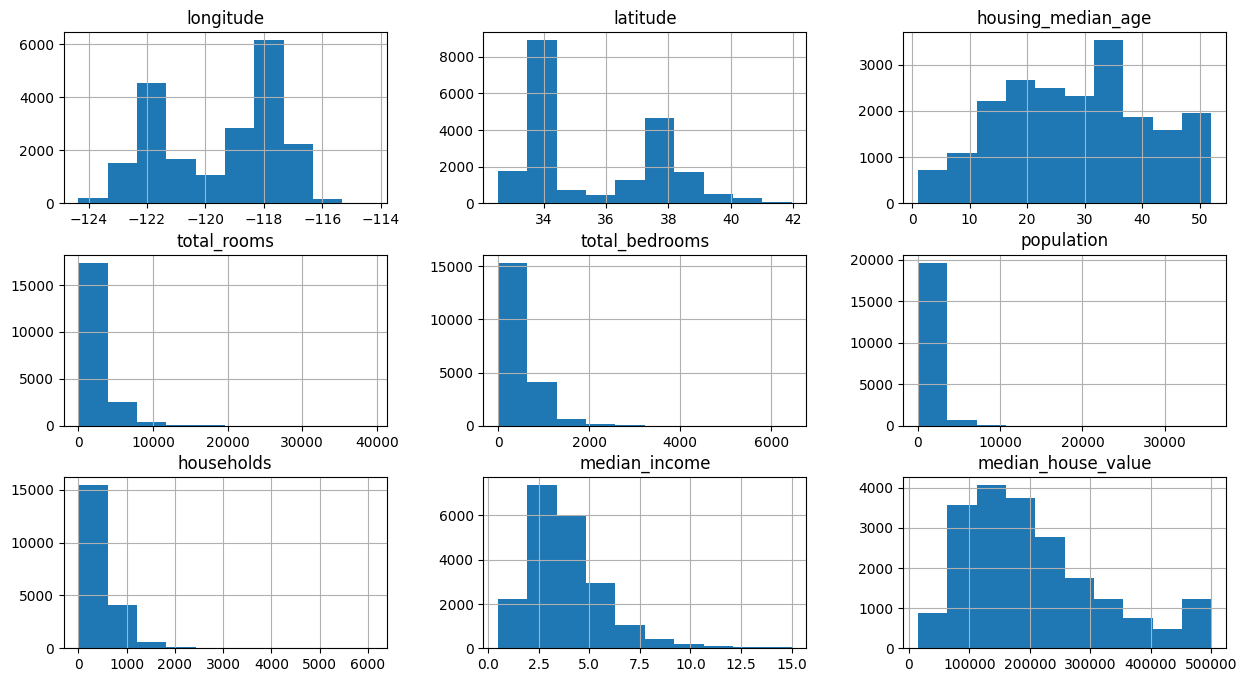

In [54]:
data.hist(figsize=(15,8))

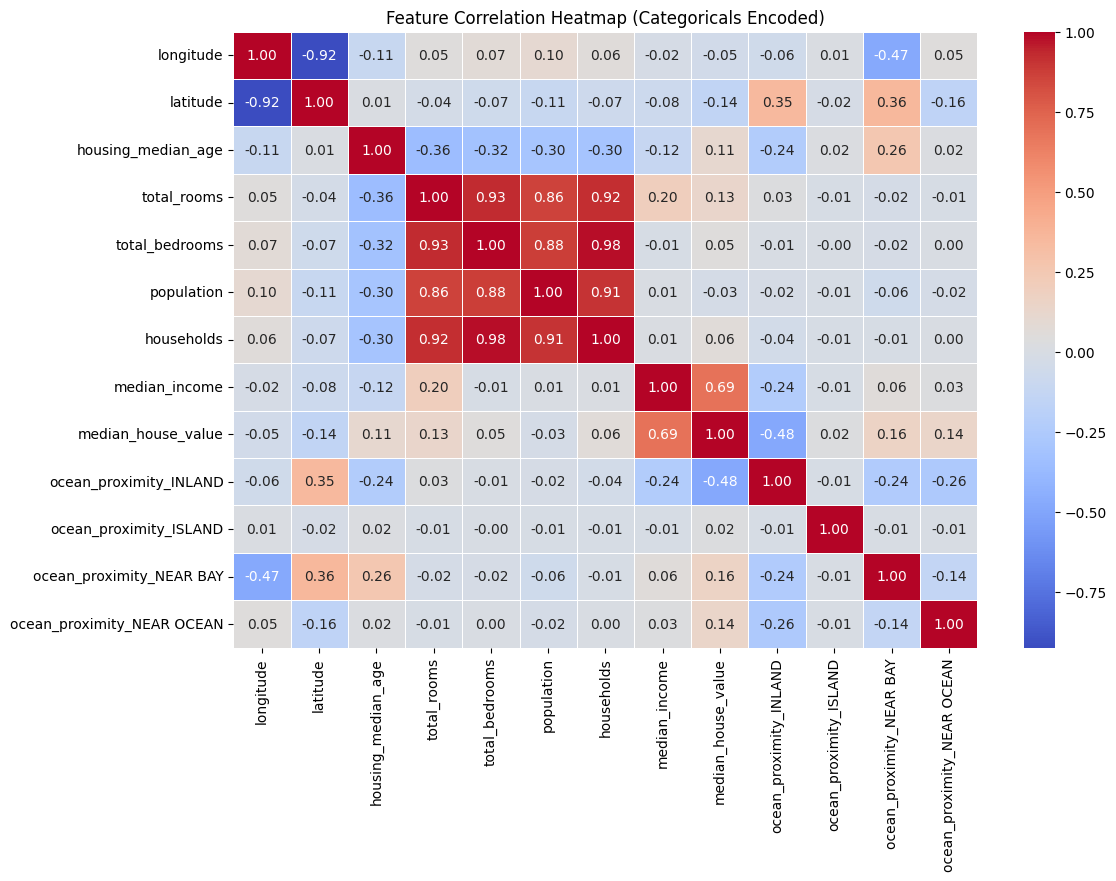

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Categoricals Encoded)")
plt.show()

<Figure size 1200x1200 with 0 Axes>

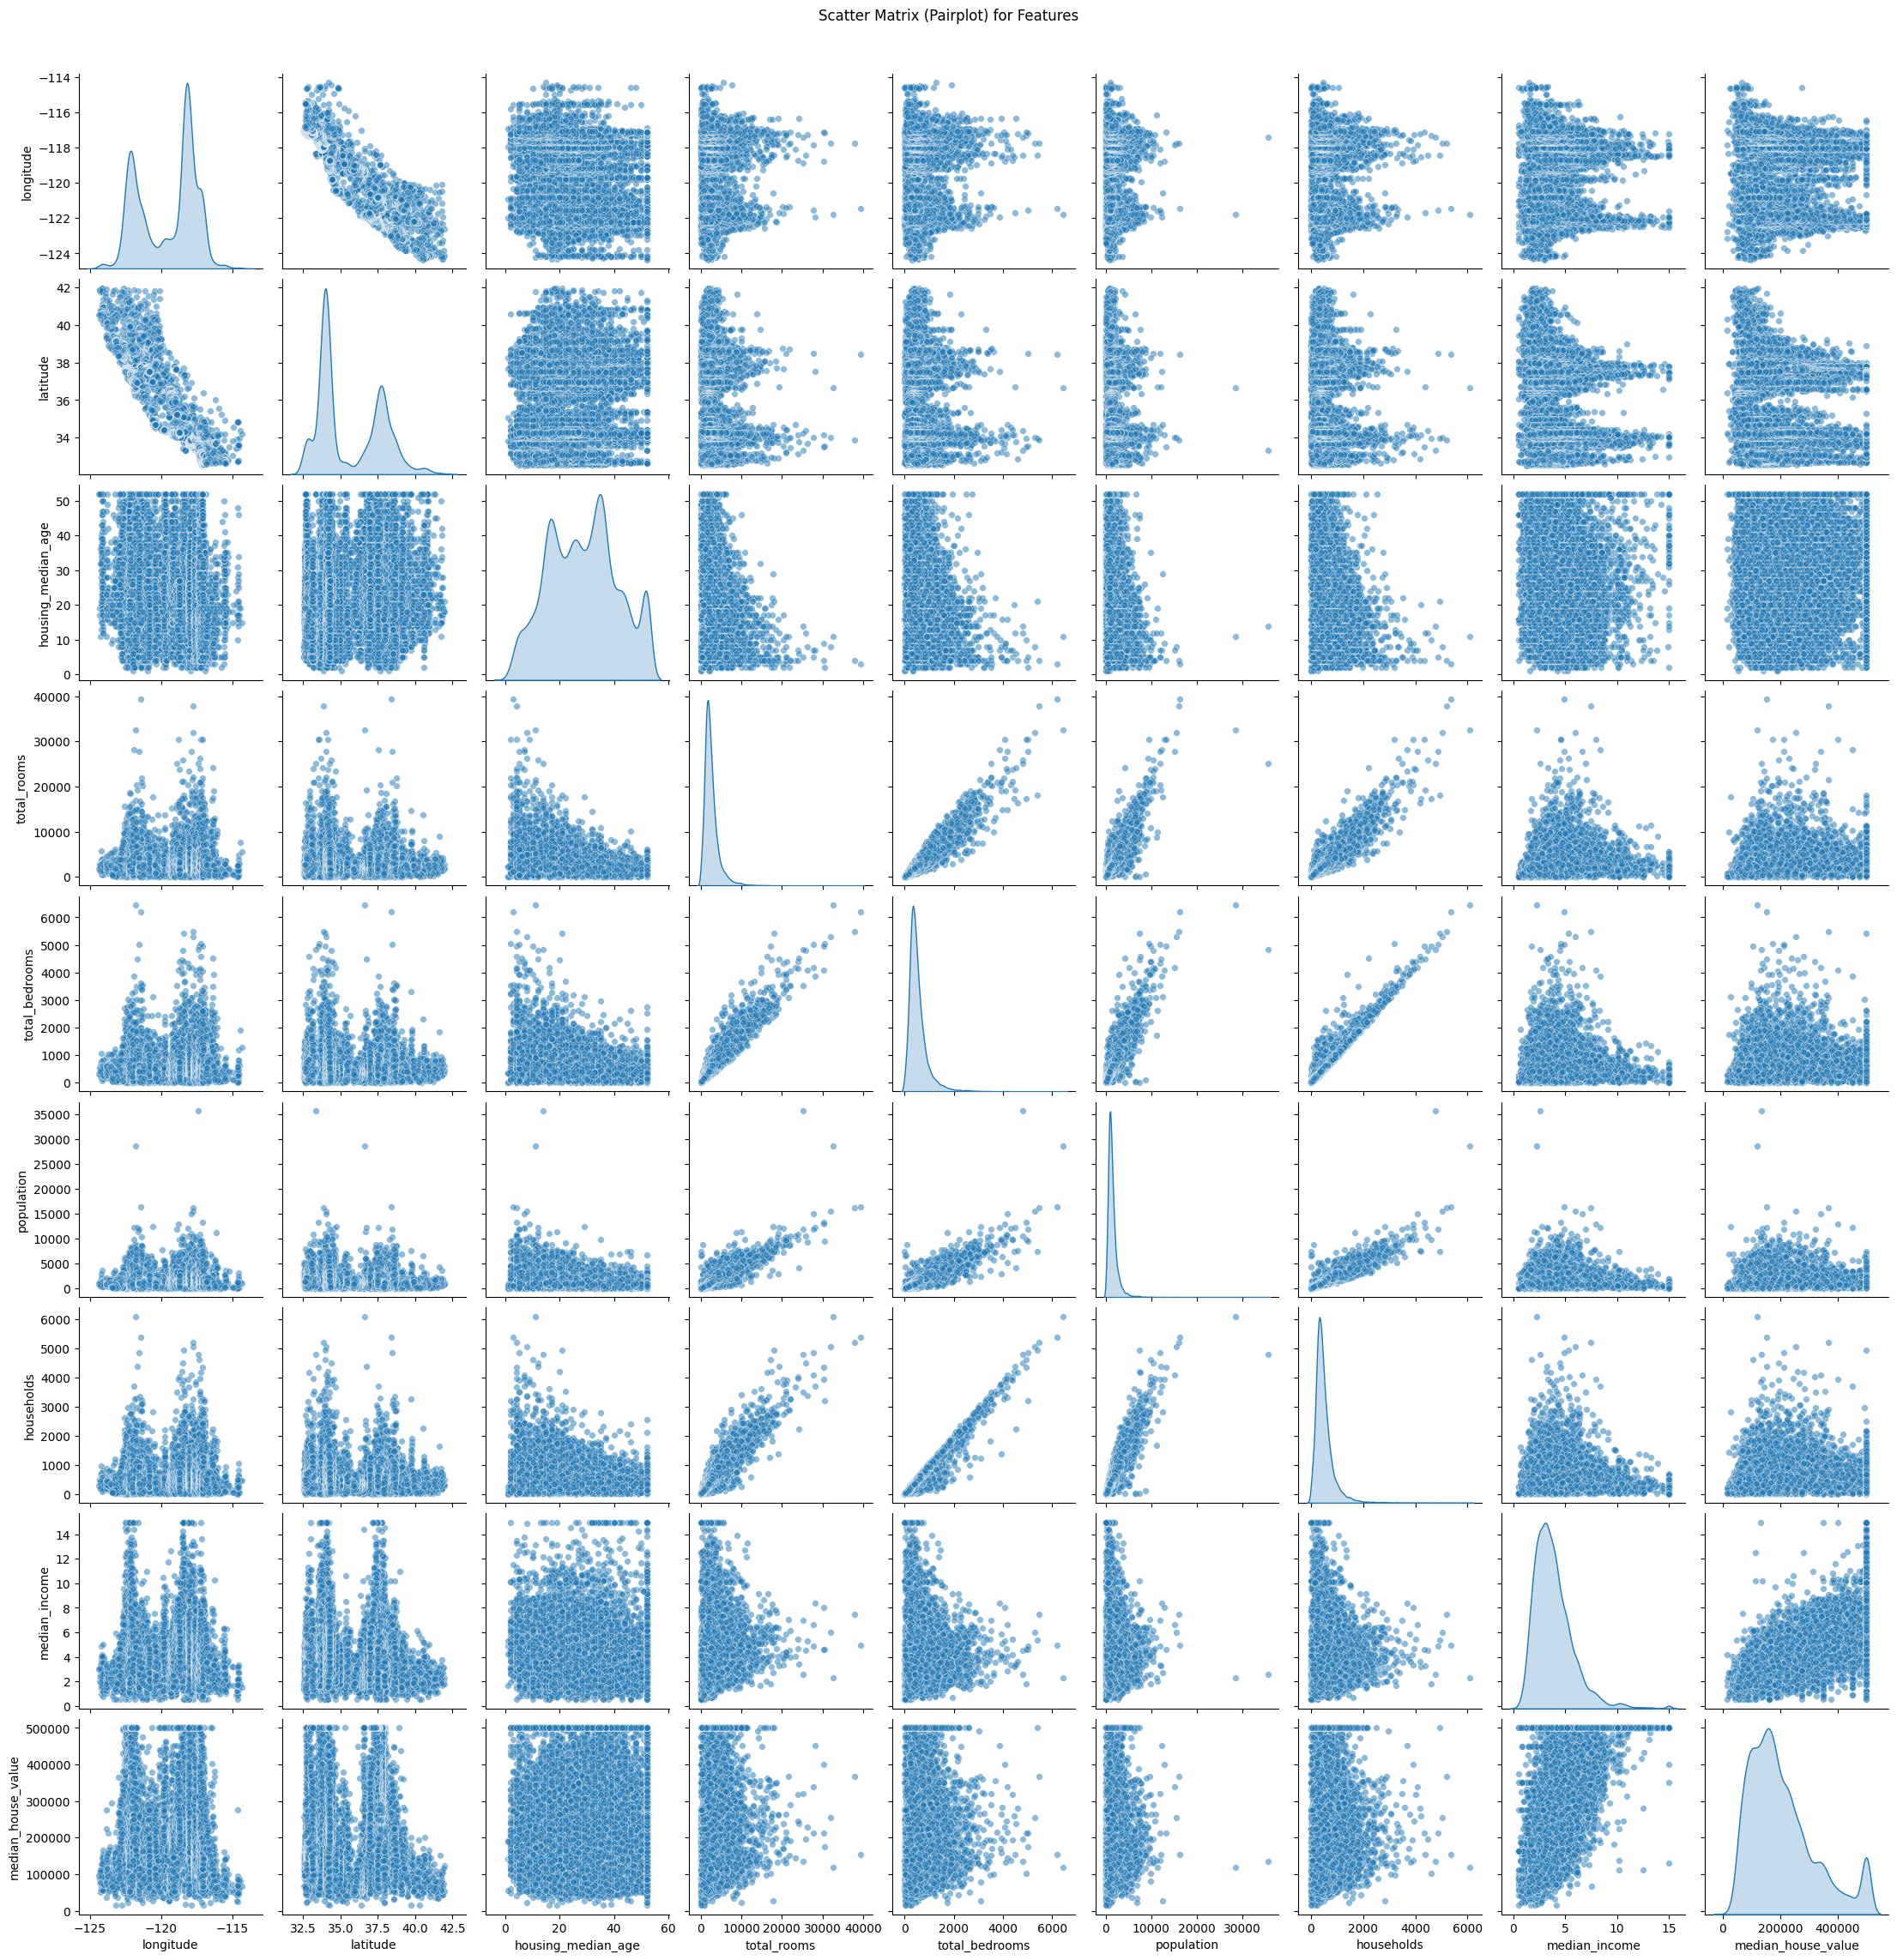

In [56]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind="kde", plot_kws={"alpha":0.5, "s":30})
plt.suptitle("Scatter Matrix (Pairplot) for Features", y=1.02)
plt.show()

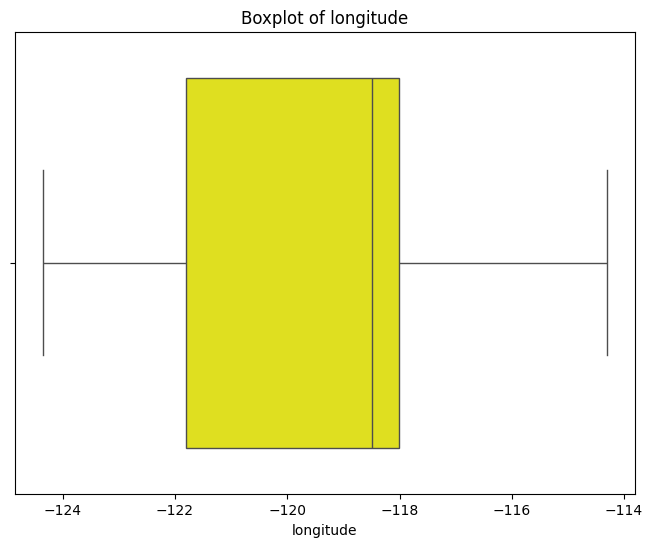

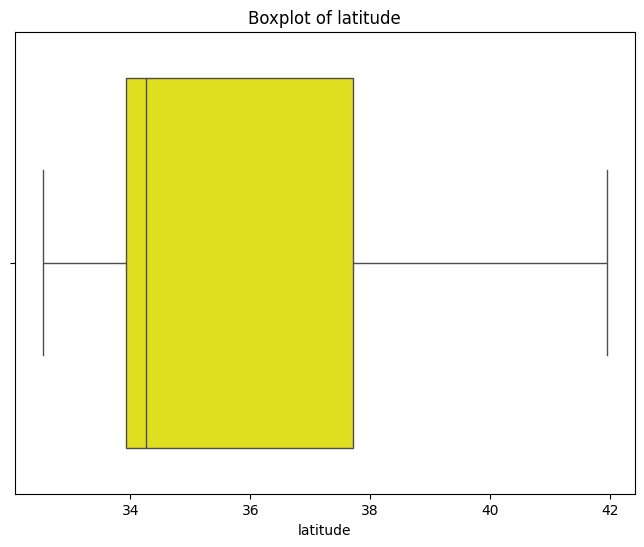

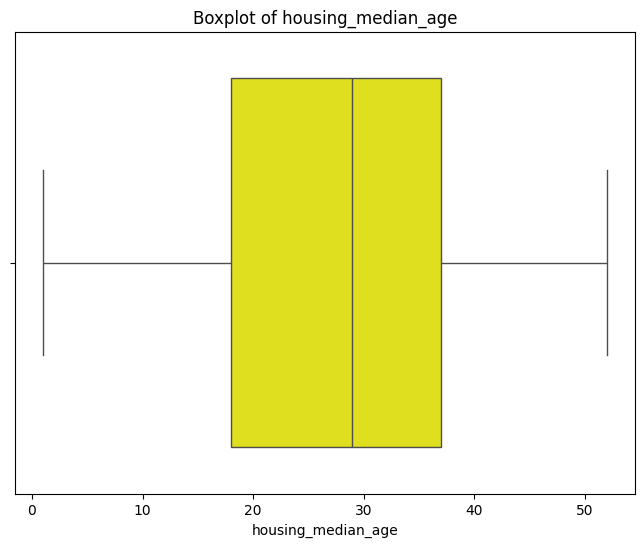

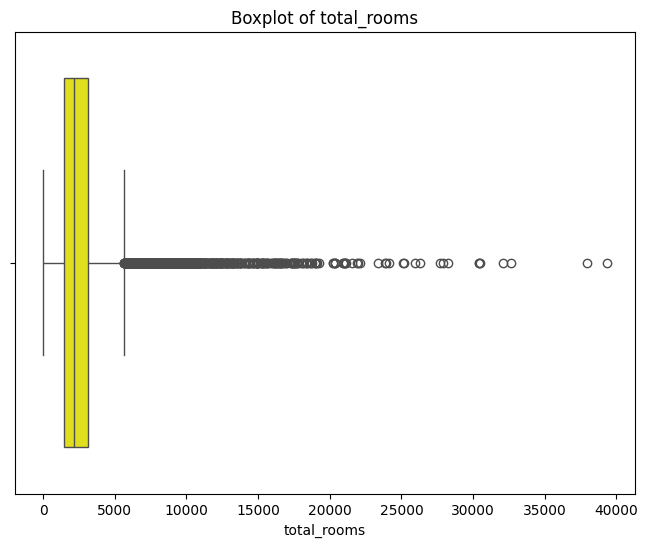

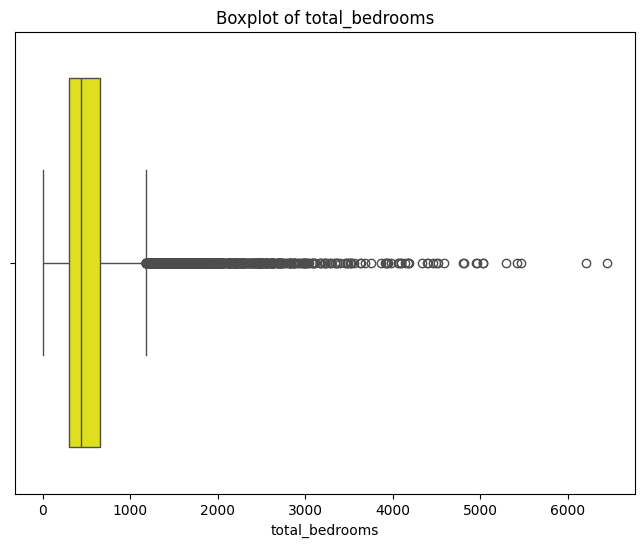

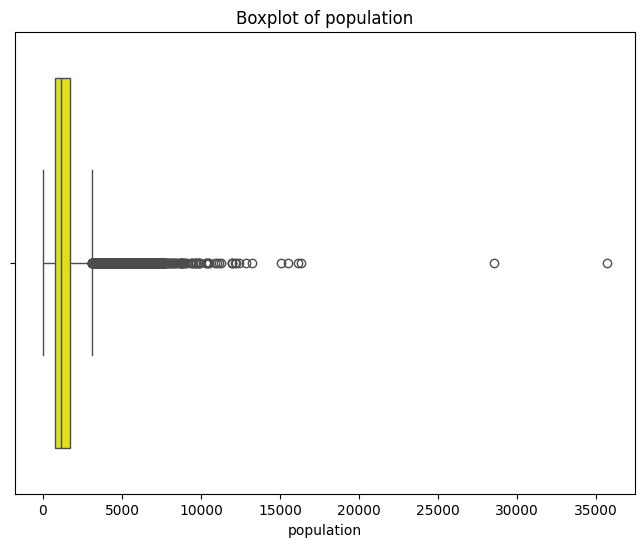

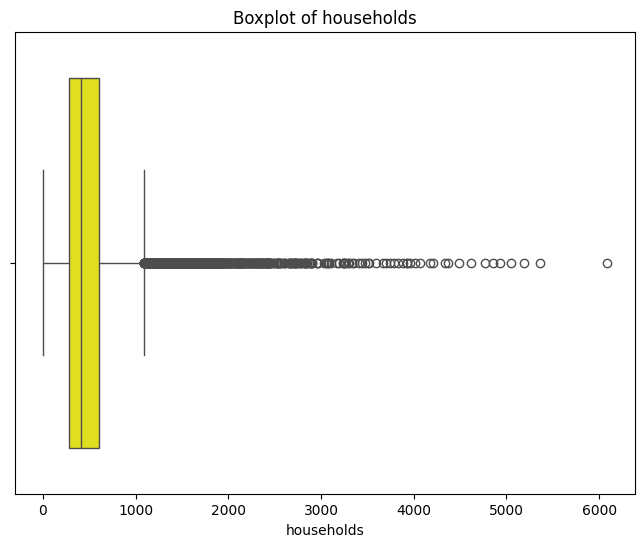

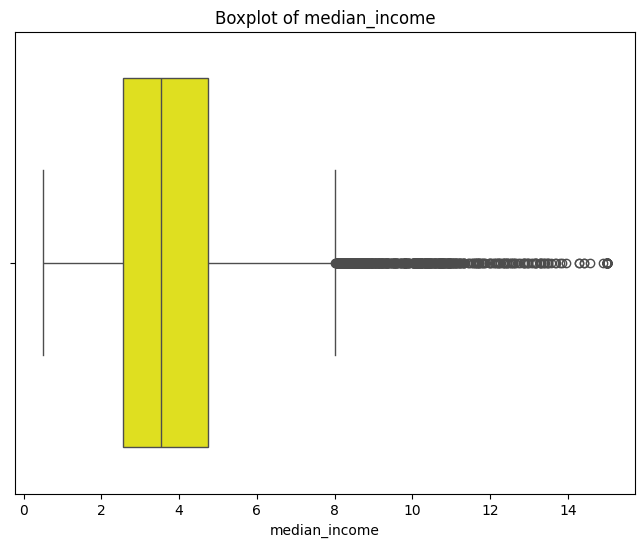

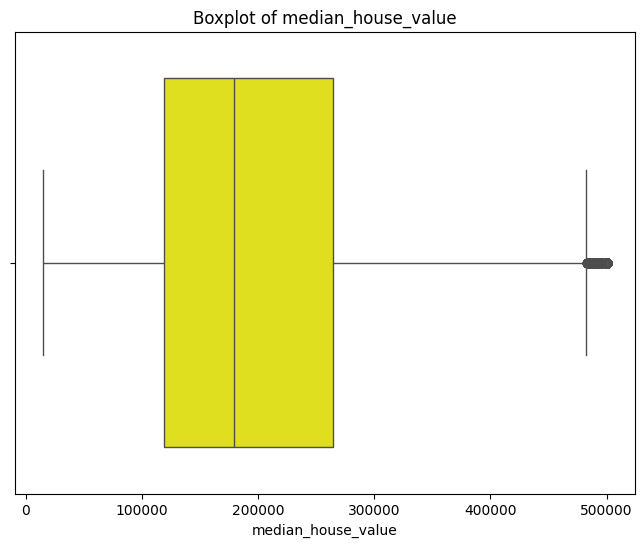

In [57]:
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns  

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[col], orient="h", color="yellow")
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [58]:
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

data_encoded['income_per_room'] = data_encoded['median_income'] / data_encoded['total_rooms']
data_encoded['bedrooms_per_household'] = data_encoded['total_bedrooms'] / data_encoded['households']
data_encoded['population_per_household'] = data_encoded['population'] / data_encoded['households']

for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    data_encoded[col] = np.log1p(data_encoded[col])

display(data_encoded.head())

feature_columns = list(data_encoded.drop('median_house_value', axis=1).columns)

with open("feature_columns.pkl", "wb") as file:
    pickle.dump(feature_columns, file)

print("Feature columns saved as 'feature_columns.pkl'")


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0     6.781058        4.867534   
1    -122.22     37.86                21.0     8.867850        7.009409   
2    -122.24     37.85                52.0     7.291656        5.252273   
3    -122.25     37.85                52.0     7.150701        5.463832   
4    -122.25     37.85                52.0     7.395108        5.638355   

   population  households  median_income  median_house_value  \
0    5.777652    4.844187       2.232720            452600.0   
1    7.784057    7.037906       2.230165            358500.0   
2    6.208590    5.181784       2.111110            352100.0   
3    6.326149    5.393628       1.893579            341300.0   
4    6.338594    5.560682       1.578195            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  income_per_room  bedrooms_per_household  \
0                       False         0.009460                1.023810   
1                       False         0.001169                0.971880   
2                       False         0.004947                1.073446   
3                       False         0.004429                1.073059   
4                       False         0.002364                1.081081   

   population_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467

Feature columns saved as 'feature_columns.pkl'


In [59]:
X = data_encoded.drop("median_house_value", axis=1)
y = data_encoded["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved as 'scaler.pkl'")


Scaler saved as 'scaler.pkl'


In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
display(results_df)

best_model = models["XGBoost"]
with open("model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Best model saved as 'model.pkl'")


Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...


MAE          RMSE        R²
Linear Regression  52655.520627  70324.984907  0.638352
Random Forest      33636.286540  51851.464206  0.803398
Gradient Boosting  34614.308315  51117.154616  0.808927
XGBoost            31369.126682  47882.536929  0.832343
CatBoost           31332.266196  47326.782098  0.836212

Best model saved as 'model.pkl'


In [61]:
xgb_pred = models["XGBoost"].predict(X_test_scaled)
gb_pred = models["Gradient Boosting"].predict(X_test_scaled)
cb_pred = models["CatBoost"].predict(X_test_scaled)

y_pred_blend = (0.4 * xgb_pred) + (0.3 * cb_pred) + (0.3 * gb_pred)

mae_blend = mean_absolute_error(y_test, y_pred_blend)
rmse_blend = np.sqrt(mean_squared_error(y_test, y_pred_blend))
r2_blend = r2_score(y_test, y_pred_blend)

print(f" Blended Model - MAE: {mae_blend:.2f}, RMSE: {rmse_blend:.2f}, R²: {r2_blend:.4f}")

results_df.loc['Blended Model'] = [mae_blend, rmse_blend, r2_blend]


 Blended Model - MAE: 30557.40, RMSE: 46648.72, R²: 0.8409


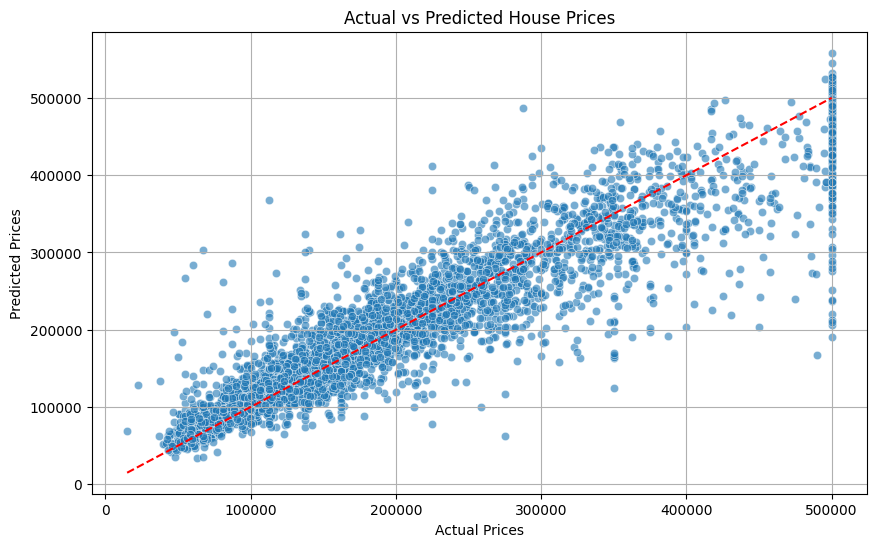

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_blend, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


    Actual Price  Predicted Price
0       245800.0    241455.674608
1       137900.0    142657.112112
2       218200.0    198427.035133
3       220800.0    134747.323870
4       170500.0    166806.814363
5        75000.0     61345.083602
6       269400.0    261969.846300
7       228900.0    218616.702245
8       500001.0    467800.875472
9        80800.0     73360.391467
10      170000.0    176474.406629
11       87800.0     89874.595194
12      242200.0    216015.515382
13      165500.0    151145.049447
14      164000.0    100965.601109
15      238000.0    164275.088959
16      283300.0    235493.324749
17      249400.0    258493.766828
18      143600.0    146100.196366
19      333100.0    336882.677019


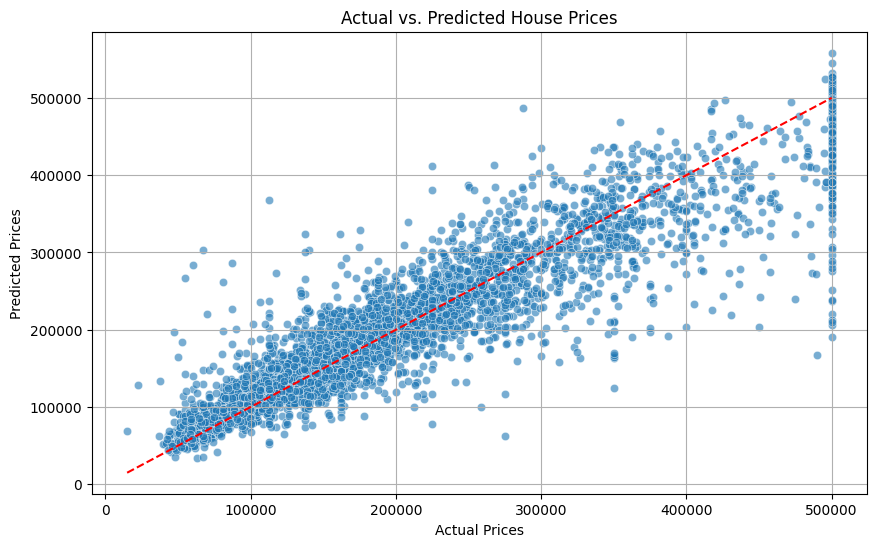

In [63]:
comparison_df = pd.DataFrame({"Actual Price": y_test.values, "Predicted Price": y_pred_blend})
print(comparison_df.head(20))  

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_blend, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()


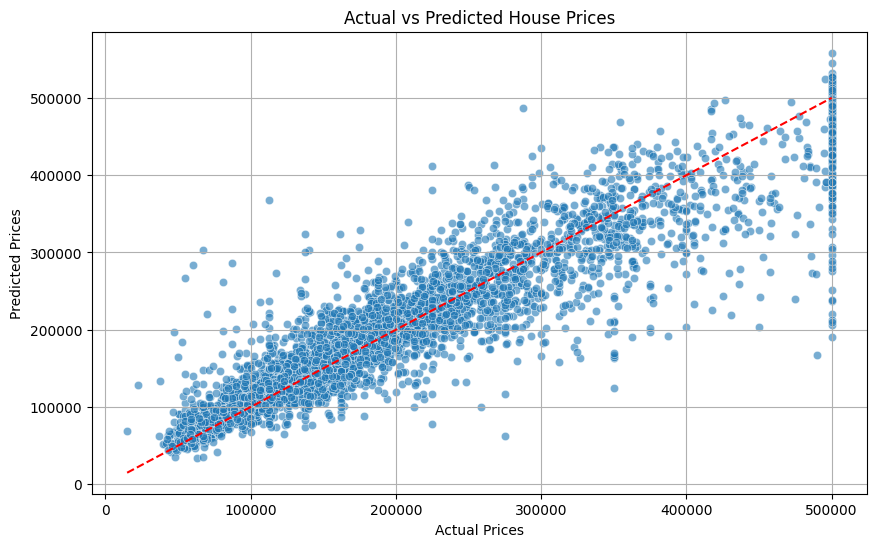

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_blend, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
